# Joint distribution

In [19]:
install.packages("PracTools")

Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘PracTools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [9]:
library(data.table)
library(weights)

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [10]:
set.seed(100923)
a = paste0('A', 1:3) 
b = paste0('B', 1:3)

sa = sample(a, 500, replace=TRUE)
sb = sample(b, 500, replace=TRUE)
dat = data.table(sa, sb)
dat[, total_sim := .N]
nrow(dat)
dat

[1] 500

sa,sb,total_sim
<chr>,<chr>,<int>
A2,B3,500
A1,B1,500
A3,B1,500
A2,B2,500
A2,B3,500
A2,B1,500
A3,B1,500
A1,B3,500
A1,B3,500


In [11]:
joint = c(10, 23, 4, 23, 56, 10, 32, 23, 34)
la = rep(c('A1', 'A2', 'A3'), 3)
lb = c(rep('B1', 3), rep('B2', 3), rep('B3', 3))
djoint = data.table(sa=la,sb=lb, joint=joint)
djoint[, total_joint := sum(joint)]

dat = merge(dat, djoint, by=c('sa', 'sb'))
dat[, N := .N, .(sa, sb)]

print(head(dat, 4))
dat[, w := joint/total_joint * total_sim/N]
print(head(dat[, .(sa, sb, w)], 4))

   sa sb total_sim joint total_joint  N
1: A1 B1       500    10         215 42
2: A1 B1       500    10         215 42
3: A1 B1       500    10         215 42
4: A1 B1       500    10         215 42
   sa sb         w
1: A1 B1 0.5537099
2: A1 B1 0.5537099
3: A1 B1 0.5537099
4: A1 B1 0.5537099


In [12]:
total = sum(djoint$joint)
djoint[, sum(joint)/total, sa]

sa,V1
<chr>,<dbl>
A1,0.3023256
A2,0.4744186
A3,0.2232558


In [13]:
total = sum(djoint$joint)
djoint[, sum(joint)/total, sa]

sa,V1
<chr>,<dbl>
A1,0.3023256
A2,0.4744186
A3,0.2232558


In [41]:
print(wpct(dat$sb))
print(wpct(dat$sb, dat$w))

   B1    B2    B3 
0.332 0.356 0.312 
       B1        B2        B3 
0.1720930 0.4139535 0.4139535 


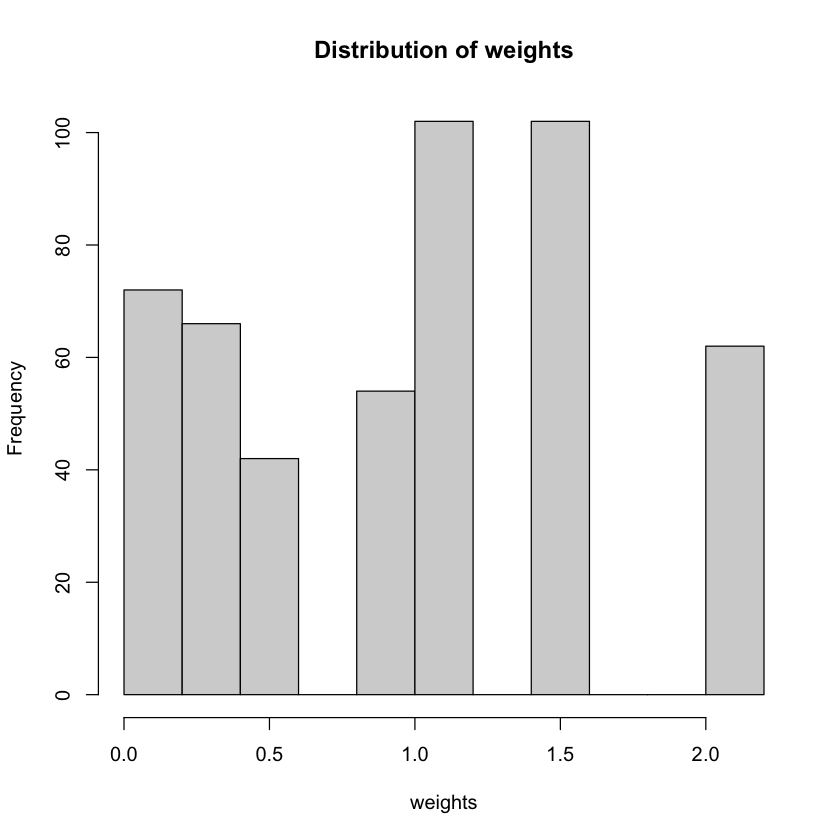

In [14]:
hist(dat$w, breaks=10, main='Distribution of weights', xlab='weights')

In [15]:
sum(dat$w)

[1] 500

In [16]:
# scaling weights 
dat[, w2 := w * 30]
sum(dat$w2)
dat[, w3 := w2 * nrow(dat)/sum(w2)]
sum(dat$w3)

[1] 15000

[1] 500

In [17]:
1 + PracTools::cv(dat$w)

ERROR: Error in loadNamespace(x): there is no package called ‘PracTools’


In [18]:
((sum(dat$w^2) / (sum(dat$w)) ^ 2) * nrow(dat)) 

[1] 1.384074

In [30]:
# cells with big weights
head(dat[w>2], 3)

sa,sb,total_sim,joint,total_joint,N,w,w2,w3
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
A2,B2,500,56,215,62,2.100525,63.01575,2.100525
A2,B2,500,56,215,62,2.100525,63.01575,2.100525
A2,B2,500,56,215,62,2.100525,63.01575,2.100525


# Raking 

In [3]:
# removes::install_github("sdaza/autumn-adjustments", force=TRUE)
library(autumn)

In [4]:
target = list(
    sa = c(A1 = 0.302, A2 = 0.474, A3 = 0.223), 
    sb = c(B1 = 0.172, B2=0.413, B3=0.413)
)
target = normalize(target)

In [5]:
result = harvest(dat, target)
print(diagnose_weights(data=result, target=target, weights=result$weights))

ERROR: Error in is.data.frame(data): object 'dat' not found


In [6]:
hist(result$weights, main="Distribution raking weights", xlab="weights")

ERROR: Error in hist(result$weights, main = "Distribution raking weights", xlab = "weights"): object 'result' not found


In [7]:
design_effect(result$weights)

ERROR: Error in is.data.frame(weights): object 'result' not found


In [8]:
effective_sample_size(result$weights)

ERROR: Error in is.data.frame(weights): object 'result' not found
